+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 9990/10000.

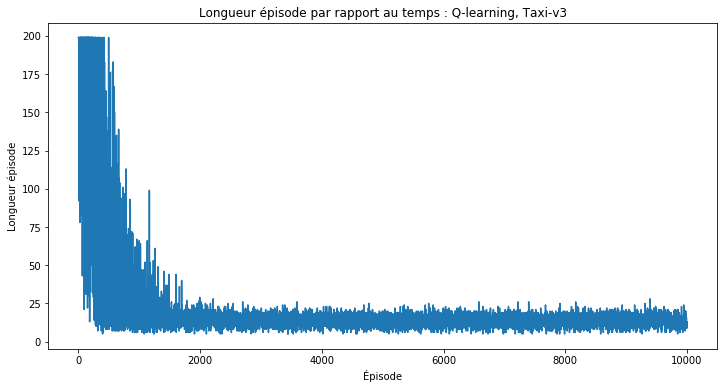

In [18]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Optimisation de politique avec méthode Q-learning
Politique epsilon-vorace
Environnement Taxi-v3 
"""
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from collections import defaultdict
import itertools
import sys
from gym.envs.toy_text import discrete

import matplotlib
from matplotlib import pyplot as plt

def afficher_statistiques(longueur_episode):
    """
    Afficher l'évolution des longueurs d'épisodes avec le temps
    """
    figure1 = plt.figure(figsize=(12,6))
    plt.plot(longueur_episode)
    plt.xlabel("Épisode")
    plt.ylabel("Longueur épisode")
    plt.title("Longueur épisode par rapport au temps : Q-learning, Taxi-v3")

def politique_optimale_Q(env, nombre_episodes, gamma=1.0, alpha= 0.1, epsilon=0.1):
    """
    Prédire la valeur de la politique par la méthode Q
        politique: fonction pi
        env: environnement de type OpenAI gym
        nombre_episodes: nombre d'épisodes générés pour les estimations
        gamma: facteur d'escompte des récompenses futures
    Retour:
        V: Dictionnaire(etat,valeur)
    """

    longueur_episode = np.zeros(nombre_episodes)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for i_episode in range(nombre_episodes):
        if i_episode % 10 == 0:
            print("\rEpisode {}/{}.".format(i_episode, nombre_episodes), end="")
            sys.stdout.flush()

         # Un episode est un tableau de tuples (etat, action, recompense)
        etat = env.reset()
        for t in itertools.count():
            
            # Choisir action selon politique e-vorace
            probabilites_actions = np.ones(env.action_space.n, dtype=float) * epsilon / env.action_space.n
            meilleure_action = np.argmax(Q[etat])
            probabilites_actions[meilleure_action] += (1.0 - epsilon)
            action = np.random.choice(np.arange(len(probabilites_actions)), p=probabilites_actions)
            
            etat_suivant, recompense, final, _ = env.step(action)            
            meilleure_action_suivante = np.argmax(Q[etat_suivant])
            
            cible = recompense+gamma*Q[etat_suivant][meilleure_action_suivante]
            delta = cible-Q[etat][action]
            Q[etat][action] += alpha*delta
            
            if final:
                longueur_episode[i_episode] = t
                break
            etat = etat_suivant
    return Q,longueur_episode

env = gym.make("Taxi-v3")
env.render()

Q,longueur_episode = politique_optimale_Q(env, nombre_episodes=10000,gamma=1.0, alpha= 0.1, epsilon=0.1)
afficher_statistiques(longueur_episode)

In [19]:
""" Test du jeu après optimisation de Q """
nb_episodes = 3
max_etapes = 99 
env.reset()
recompenses = []

for episode in range(nb_episodes):
    etat = env.reset()
    final = False
    total_recompenses = 0
    print("**********************************")
    print("Épisode : ", episode)

    for etape in range(max_etapes):
        env.render()
        action = np.argmax(Q[etat])
        
        etat_suivant, recompense, final, _ = env.step(action)
        
        total_recompenses += recompense
        
        if final:
            recompenses.append(total_recompenses)
            print ("Total des récompenses de l'épisode", total_recompenses)
            break
        etat = etat_suivant
env.close()
print ("Moyenne de récompenses par épisode: " +  str(sum(recompenses)/nb_episodes))

**********************************
Épisode :  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|


In [20]:
Q

defaultdict(<function __main__.politique_optimale_Q.<locals>.<lambda>()>,
            {221: array([-2.75819017,  8.        ,  3.17884577,  2.98986159, -3.87097754,
                    -4.18030538]),
             241: array([-4.08866349, -2.84911154,  0.36193511,  7.        , -4.99723325,
                    -4.8228851 ]),
             341: array([ -6.83722826,   5.9658219 ,  -6.41124128,  -3.38168373,
                    -10.56537925,  -8.9348062 ]),
             441: array([-5.14368741,  4.16949465, -6.85635134, -6.91803956, -8.44458058,
                    -7.80978897]),
             141: array([ 5.99999985, -6.20872576, -3.76604609, -3.06023608, -7.28942023,
                    -7.6754101 ]),
             261: array([-3.1437544 , -3.90808279, -5.43268525,  5.99999996, -6.85742108,
                    -5.57128839]),
             361: array([-7.06412526,  4.99956036, -6.3783992 , -5.7871749 , -7.41791521,
                    -9.91865992]),
             461: array([-7.22853634,  3.8845